# Projeto de Visualização de Dados de Limite de Crédito


O objetivo deste projeto é analisar dados relacionados ao **limite de crédito** de indivíduos, criando três gráficos interativos com o Plotly Express. A análise foca em identificar os principais fatores que influenciam os limites de crédito mais altos, ajudando a entender padrões e relações entre as variáveis.

## Dicionário de Variáveis

O dataframe contém as seguintes variáveis:

- **Nome**: O nome completo de cada indivíduo da base de dados.
- **Idade**: A idade de cada indivíduo.
- **Profissão**: A ocupação ou profissão atual do indivíduo.
- **Salário**: O salário registrado do indivíduo.
- **Limite de Crédito**: O limite de crédito disponível para cada indivíduo.
- **Histórico de Inadimplência**:
  - **0**: Nunca teve histórico de inadimplência.
  - **1**: Já teve histórico de inadimplência em algum momento.
- **Estado Civil**: O estado civil do indivíduo (por exemplo, solteiro, casado, divorciado).
- **Imóvel Próprio**:
  - **0**: Não possui imóvel próprio.
  - **1**: Possui imóvel próprio.


In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(5)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1


## Exploração e Tratamento dos Dados

In [3]:
# Informação básica do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nome                     8 non-null      object
 1   Idade                    8 non-null      int64 
 2   Profissão                8 non-null      object
 3   Salário                  8 non-null      object
 4   Limite_Credito           8 non-null      object
 5   Historico_Inadimplencia  8 non-null      object
 6   Estado_Civil             8 non-null      object
 7   Imovel_Proprio           8 non-null      object
dtypes: int64(1), object(7)
memory usage: 644.0+ bytes


In [4]:
# Conversão do tipo de dados
def conversao_inteiros(df, colunas):
    for coluna in colunas:
        df[coluna] = df[coluna].astype(int)

conversao_inteiros(df, ['Salário', 'Limite_Credito', 'Historico_Inadimplencia', 'Imovel_Proprio'])

df.info()  # Conferência da conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Nome                     8 non-null      object
 1   Idade                    8 non-null      int64 
 2   Profissão                8 non-null      object
 3   Salário                  8 non-null      int64 
 4   Limite_Credito           8 non-null      int64 
 5   Historico_Inadimplencia  8 non-null      int64 
 6   Estado_Civil             8 non-null      object
 7   Imovel_Proprio           8 non-null      int64 
dtypes: int64(5), object(3)
memory usage: 644.0+ bytes


In [5]:
# Estatística básica
df.describe()

,Idade,Salário,Limite_Credito,Historico_Inadimplencia,Imovel_Proprio
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,35.125000,7150.000000,3031.250000,0.375000,0.375000
std,12.900028,4970.771714,3163.512684,0.517549,0.517549
min,22.000000,1200.000000,250.000000,0.000000,0.000000
25%,24.750000,3750.000000,875.000000,0.000000,0.000000
50%,32.500000,6500.000000,2250.000000,0.000000,0.000000
75%,41.250000,10500.000000,4000.000000,1.000000,1.000000
max,60.000000,15000.000000,10000.000000,1.000000,1.000000


É possível observar a presença de **outliers** no **limite de crédito**. Mas, por se tratar de uma base de estudo com apenas 8 entradas, não será realizada alteração na variável.

In [6]:
# Dados únicos
df.nunique()

,0
Nome,8
Idade,8
Profissão,5
Salário,8
Limite_Credito,7
Historico_Inadimplencia,2
Estado_Civil,2
Imovel_Proprio,2


In [7]:
# Substituição de dados

# Criação da variável categórica para histórico de inadimplência, facilitando a visualização
Historico_Inadimplencia = {
    0: 'Sem histórico',
    1: 'Inadimplente'
}

df['Historico_Inadimplencia_Cat'] = df['Historico_Inadimplencia'].map(Historico_Inadimplencia)

# Criação da variável booleana para estado civil, facilitando a análise
estado_civil_cod = {
    'Solteiro': 0,
    'Casamento': 1
}

df['Estado_Civil_Cod'] = df['Estado_Civil'].map(estado_civil_cod)

df

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio,Historico_Inadimplencia_Cat,Estado_Civil_Cod
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0,Sem histórico,1
1,Joao,30,Médico,8000,4000,0,Casamento,0,Sem histórico,1
2,Charlie,35,Professor,5000,4000,0,Solteiro,0,Sem histórico,0
3,David,40,Advogado,10000,1000,1,Solteiro,1,Inadimplente,0
4,Eva,45,Médico,12000,10000,0,Casamento,1,Sem histórico,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1,Inadimplente,0
6,Denize,22,Estudante,1200,500,0,Solteiro,0,Sem histórico,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0,Inadimplente,0


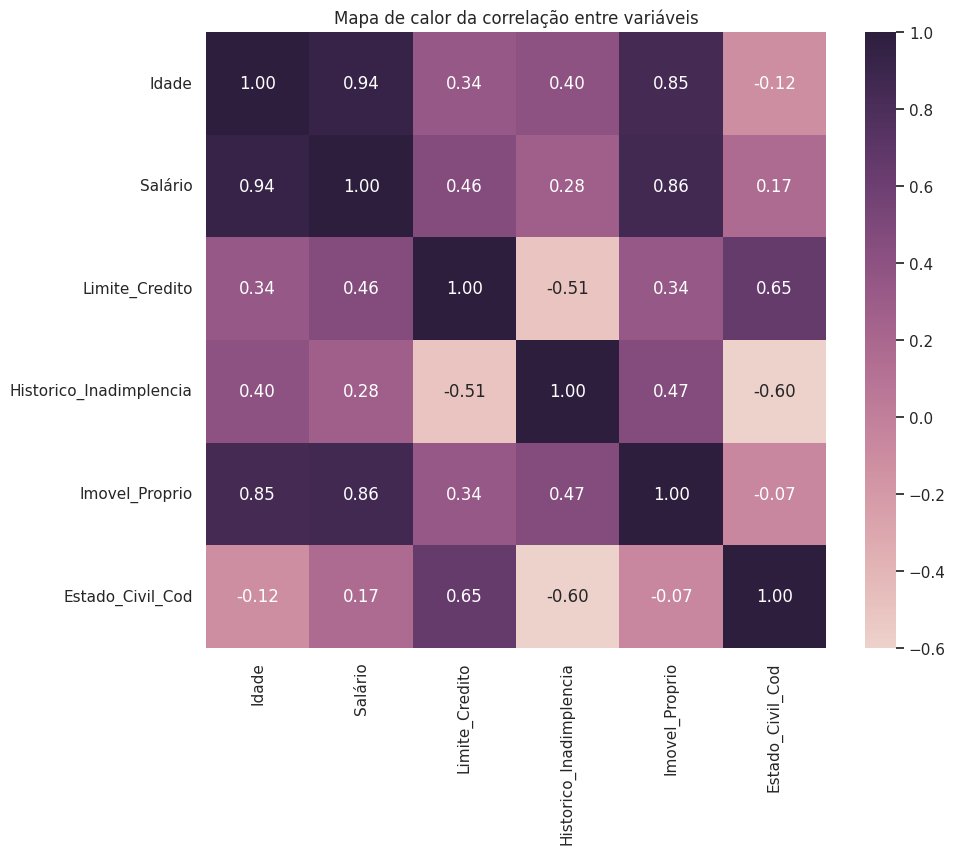

In [8]:
# Correlação entre variáveis
var_numericas = df.select_dtypes(include=['int64'])  # Separa colunas numéricas
df_correlacao = var_numericas.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.heatmap(df_correlacao, annot=True, fmt='.2f', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Mapa de calor da correlação entre variáveis')
plt.show()

Ao analisar o mapa de calor, observa-se que o **limite de crédito** apresenta uma correlação negativa com o **histórico de inadimplência** (-0.51). Isso indica que quanto maior o limite de crédito, menores são as chances de o indivíduo ter um histórico de inadimplência.

Também foram identificadas correlações positivas relevantes entre o **limite de crédito** e as variáveis **estado civil** (0.65) e **salário** (0.46). Esses valores sugerem que limites de crédito mais altos estão associados a pessoas casadas e com salários mais elevados.

Vamos explorar essas relações no próximo item.

## Visualização dos Dados

### Histórico de Inadimplência

In [9]:
# Boxplot - Histórico de Inadimplência vs Limite de Crédito
fig = px.box(df, x='Historico_Inadimplencia_Cat', y='Limite_Credito',
             title='Limite de Crédito por Histórico de Inadimplência',
             labels={'Limite_Credito': 'Limite de Crédito (R$)',
                     'Historico_Inadimplencia_Cat': 'Histórico de Inadimplência'},
             width=800)

fig.show()

A análise do **histórico de inadimplência** mostra que as pessoas com histórico de inadimplência tendem a ter limites de crédito mais baixos. Já aquelas sem histórico apresentam uma maior variação, com algumas pessoas tendo limites muito altos. Esse padrão é esperado, pois instituições financeiras geralmente associam o histórico de inadimplência a um maior risco de crédito, resultando em limites mais baixos.

### Profissão

In [10]:
# Gráfico de barras - Profissão vs Limite de Crédito
salario_por_profissao = df.groupby('Profissão')['Limite_Credito'].mean().reset_index()

fig = px.bar(salario_por_profissao, x='Profissão', y='Limite_Credito',
             title='Limite de Crédito por Profissão',
             labels={'Limite_Credito': 'Limite de Crédito Médio (R$)', 'Profissão': 'Profissão'},
             width=800)

fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')  # Rótulo nas barras
fig.update_layout(yaxis=dict(showticklabels=False))  # Eixo y sem rótulo
fig.show()

A **profissão** tem um impacto significativo no **limite de crédito**. Médicos possuem limites de crédito mais altos, enquanto estudantes possuem limites mais baixos. Isso é consistente com o fato de que profissões com maior estabilidade financeira tendem a resultar em maiores limites de crédito, enquanto estudantes, muitas vezes sem uma fonte de renda estável, têm limites mais baixos.

### Salário e Estado Civil

In [11]:
# Gráfico de Dispersão - Limite de Crédito vs Salário
# As cores são determinadas pelo Estado Civil
fig = px.scatter(df, x='Salário', y='Limite_Credito',
                 title='Limite de Crédito por Salário',
                 labels={'Salário': 'Salário (R$)', 'Estado_Civil': 'Estado Civil',
                         'Limite_Credito': 'Limite de Crédito (R$)'},
                 color='Estado_Civil', color_discrete_sequence=["orange", "blue"],
                 width=800)

fig.update_traces(marker_size=12)
fig.show()

Foi observado que, de maneira geral, **salários** mais baixos estão associados a **limites de crédito** mais baixos. No entanto, ainda existem pessoas com salários altos que possuem limites de crédito igual ou abaixo de 2 mil, o que pode indicar que outros fatores, como o histórico de inadimplência, estão influenciando as decisões de crédito. Além disso, todos os indivíduos com limite igual ou abaixo de 2 mil são solteiros, o que sugere que o **estado civil** pode ser um fator relevante, possivelmente relacionado ao risco financeiro percebido pelas instituições.

### Conclusões

Com base nas análises realizadas, é possível concluir que:

* O histórico de inadimplência é o principal fator determinante no limite de crédito. Pessoas sem histórico de inadimplência tendem a ter limites de crédito mais altos.

* O estado civil também influencia, com solteiros apresentando limites mais baixos, o que pode estar relacionado a um maior risco percebido ou uma maior incerteza financeira associada a esse grupo.

* As profissões que indicam maior estabilidade financeira, como a de médico, estão associadas a limites de crédito mais altos.

* Salários muito baixos estão diretamente relacionados a limites de crédito mais baixos, mas o histórico de inadimplência e o estado civil também desempenhem papéis importantes.

Sugere-se que essas análises sejam realizadas com um grupo maior de indivíduos, para verificar se os padrões observados se mantêm, além de aplicar análises estatísticas mais complexas que validem essas conclusões.
